In [1]:
# [OpenCV 讀取圖片]
import cv2
import numpy as np
img = cv2.imread('CJCU.png')
print("Default:img.shape",img.shape,"\nDefault:type(img)",type(img))

Default:img.shape (323, 323, 3) 
Default:type(img) <class 'numpy.ndarray'>


In [2]:
#圖檔格式
''' cv2.IMREAD_COLOR:此為預設值，這種格式會讀取 RGB 三個 channels 的彩色圖片，而忽略透明度的 channel。
    cv2.IMREAD_GRAYSCALE:以灰階的格式來讀取圖片。
    cv2.IMREAD_UNCHANGED:讀取圖片中所有的 channels，包含透明度的 channel。'''
img1 = cv2.imread('CJCU.png', cv2.IMREAD_COLOR)
print("IMREAD_COLOR:img.shape",img1.shape,type(img1))
img2 = cv2.imread('CJCU.png', cv2.IMREAD_GRAYSCALE)
print("IMREAD_GRAYSCALE:img.shape",img2.shape,type(img2))
img3 = cv2.imread('CJCU.png', cv2.IMREAD_UNCHANGED)
print("IMREAD_UNCHANGED:img.shape",img3.shape,type(img3))

IMREAD_COLOR:img.shape (323, 323, 3) <class 'numpy.ndarray'>
IMREAD_GRAYSCALE:img.shape (323, 323) <class 'numpy.ndarray'>
IMREAD_UNCHANGED:img.shape (323, 323, 3) <class 'numpy.ndarray'>


In [3]:
#顯示影像
cv2.imshow('Default Image', img)
cv2.imshow('IMREAD_COLOR Image', img1)
cv2.imshow('IMREAD_GRAYSCALE Image', img2)
cv2.namedWindow('IMREAD_UNCHANGED Image', cv2.WINDOW_NORMAL)# 讓視窗可以自由縮放大小
cv2.imshow('IMREAD_UNCHANGED Image', img3)
# 按下任意鍵則關閉所有視窗
cv2.waitKey(0)#等待與讀取使用者按下的按鍵,參數是等待時間（單位為毫秒）,若設定為 0 就表示持續等待至使用者按下按鍵為止
cv2.destroyAllWindows()#關閉所有 OpenCV 的視窗

In [4]:
# 寫入圖檔
cv2.imwrite(r'C:\Users\User\data structure\output\output.jpg', img)
# 寫入不同圖檔格式
cv2.imwrite(r'C:\Users\User\data structure\output\output.png', img)
cv2.imwrite(r'C:\Users\User\data structure\output\output.tiff', img)

True

In [5]:
#影像分類-FCM
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Classification:
    def __init__(self, data, noClass):
        self.noC=noClass
        self.noD=data.size
        self.dataList=data
        self.classCenter=np.random.random(self.noC)*255
        self.distance=np.zeros([self.noD,self.noC], dtype = float)
        self.degree=np.zeros([self.noD,self.noC], dtype = float)        
        self.m=3
        self.Result=np.zeros([self.noD], dtype = np.uint8)
        pass
    
    def fuzzyCMeans(self,times):
        self.updateClassCenter=np.zeros([times+1,self.noC], dtype = float)        
        self.updateClassCenter[0]= self.classCenter    
        self.Err=np.zeros([times], dtype = float)
        for i in range(times):
            self.computeAllDistance()
            self.computeDegree()
            self.updateCenter()
            self.updateClassCenter[i+1]= self.classCenter
            for j in range(self.noC):
                self.Err[i]+=self.computeDistance(self.updateClassCenter[i+1][j],self.updateClassCenter[i][j])
                pass
            self.Err[i]/=self.noC
            pass    
        pass

    def plotErr(self,start=0):
        index = np.arange(len(self.Err))
        plt.plot(index[int(start):len(self.Err)], self.Err[int(start):len(self.Err)])
        plt.show()
        pass    
    
    def plotResult(self,start=0):
        index = np.arange(len(self.updateClassCenter))
        plt.plot(index[int(start):len(self.updateClassCenter)], self.updateClassCenter[int(start):len(self.updateClassCenter)])
        plt.show()
        pass
    
    def computeDistance(self, x, y):
        return np.power(np.power((x-y),2),0.5)
    
    def computeAllDistance(self):
        for p in range(self.noD):
            for c in range(self.noC):
                self.distance[p,c]=self.computeDistance(self.dataList[p],self.classCenter[c])
                pass
            pass
        pass
    
    def computeDegree(self):
        for p in range(self.noD):
            sumdis=0
            for c in range(self.noC):
                sumdis+=np.power(self.distance[p,c],(-2)/(self.m-1))
                pass
            for c in range(self.noC):
                self.degree[p,c]=np.power(self.distance[p,c],(-2)/(self.m-1))/sumdis
                pass
            pass        
        pass
    
    def updateCenter(self):        
        for c in range(self.noC):
            sumval=0
            sumdeg=0
            for p in range(self.noD):
                tmp=np.power(self.degree[p,c],self.m)
                sumval+=tmp*self.dataList[p]
                sumdeg+=tmp
                pass
            self.classCenter[c]=sumval/sumdeg
            pass        
        pass    

    def returnResult(self):        
        for p in range(self.noD):
            self.Result[p]=0
            for c in range(1,self.noC):
                if(self.degree[p,c]>self.degree[p,self.Result[p]]):
                    self.Result[p]=c
                    pass
                pass
            pass
        self.Result*=int(np.floor(255/self.noC))
        pass

In [10]:
import cv2
import numpy as np
img = cv2.imread('CJCUG.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Original',img)
(height, width) = img.shape

noClass=3

img1D=img.reshape(height*width)
n=Classification(img1D, noClass)

for i in range(5):    
    n.fuzzyCMeans(1)
    n.returnResult()
    result=n.Result.reshape(height, width)
    cv2.imshow('Result'+str(i),result)
    
cv2.waitKey(0)#等待與讀取使用者按下的按鍵,參數是等待時間（單位為毫秒）,若設定為 0 就表示持續等待至使用者按下按鍵為止
cv2.destroyAllWindows()#關閉所有 OpenCV 的視窗>

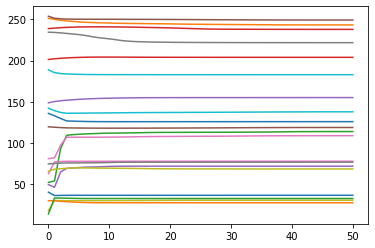

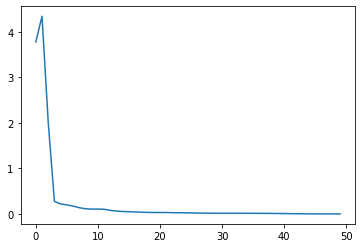

In [11]:
import cv2
import numpy as np
img = cv2.imread('CJCUSG.png', cv2.IMREAD_GRAYSCALE)
(height, width) = img.shape

noClass=20
img1D=img.reshape(height*width)
n=Classification(img1D, noClass)
n.fuzzyCMeans(50)
n.plotResult()
n.plotErr()

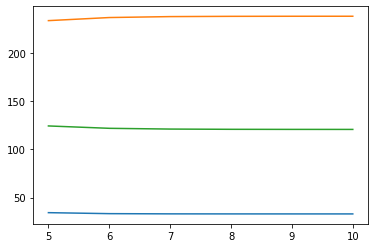

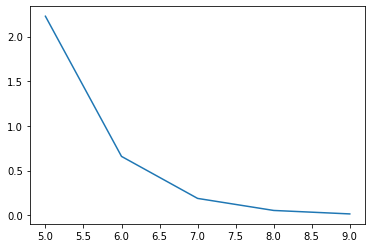

In [7]:
n.plotResult(5)
n.plotErr(5)